## Lab # 1
_Tream 1_ 
_Andrei Ivlev, Olga Ikisheva , Olesya Runushkina_

##### Dataset representation

In [18]:
#importing the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import warnings
warnings.filterwarnings('ignore')

**dataset link** https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023/

**Context**

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**Content**

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [20]:
#importing the data - for our lab 1 we've picked the world happiness report of 2023 

WHR2023 = pd.read_csv('WHR2023.csv', header=0, sep=',')
WHR2023.tail(10)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
127,Zambia,3.982,0.094,4.167,3.797,8.074,0.694,55.032,0.791,0.098,0.818,1.778,0.914,0.890,0.095,0.545,0.189,0.080,1.270
128,Tanzania,3.694,0.075,3.840,3.547,7.857,0.653,59.401,0.838,0.182,0.554,1.778,0.836,0.787,0.214,0.607,0.234,0.269,0.747
129,Comoros,3.545,0.117,3.774,3.317,8.075,0.471,59.425,0.470,-0.014,0.727,1.778,0.914,0.327,0.215,0.117,0.129,0.145,1.699
130,Malawi,3.495,0.090,3.671,3.320,7.302,0.531,58.475,0.750,0.005,0.749,1.778,0.637,0.479,0.189,0.490,0.139,0.129,1.432
131,Botswana,3.435,0.136,3.702,3.168,9.629,0.753,54.725,0.742,-0.215,0.830,1.778,1.471,1.041,0.087,0.480,0.021,0.071,0.264
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
136,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976


In [21]:
WHR2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [22]:
WHR2023.describe() 

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


We have chosen 5 continuous variables from the dataset - Ladder score, Logged GDP per capita, Generosity, Healty life expectancy, Freedom to make life choises.


**Ladder score** - Happiness score or subjective well-being. This is the national average response to the question of life evaluations.

**Logged GDP per capita** - The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2023.

**Generosity** - Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

**Healthy life expectancy** - Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.

**Freedom to make life choices** - Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked



In [23]:
#choosing the variables for our subset, the Ladder score is the target Happiness score
data_ = WHR2023[['Ladder score', 'Logged GDP per capita', 'Generosity', 'Healthy life expectancy','Freedom to make life choices']]
data = np.nan_to_num(data_) #removing NaN values
import pandas as pd
data = pd.DataFrame(data, columns = ['Ladder score', 'Logged GDP per capita', 'Generosity', 'Healthy life expectancy','Freedom to make life choices'])
data.tail(10)

,Ladder score,Logged GDP per capita,Generosity,Healthy life expectancy,Freedom to make life choices
127,3.982,8.074,0.098,55.032,0.791
128,3.694,7.857,0.182,59.401,0.838
129,3.545,8.075,-0.014,59.425,0.470
130,3.495,7.302,0.005,58.475,0.750
131,3.435,9.629,-0.215,54.725,0.742
132,3.207,7.007,0.086,55.375,0.664
133,3.204,7.641,-0.046,54.050,0.654
134,3.138,7.394,0.105,54.900,0.660
135,2.392,9.478,-0.141,66.149,0.474
136,1.859,7.324,-0.081,54.712,0.382


##### Non-parametric estimation of PDF in form of histogram and using kernel density function / probability law

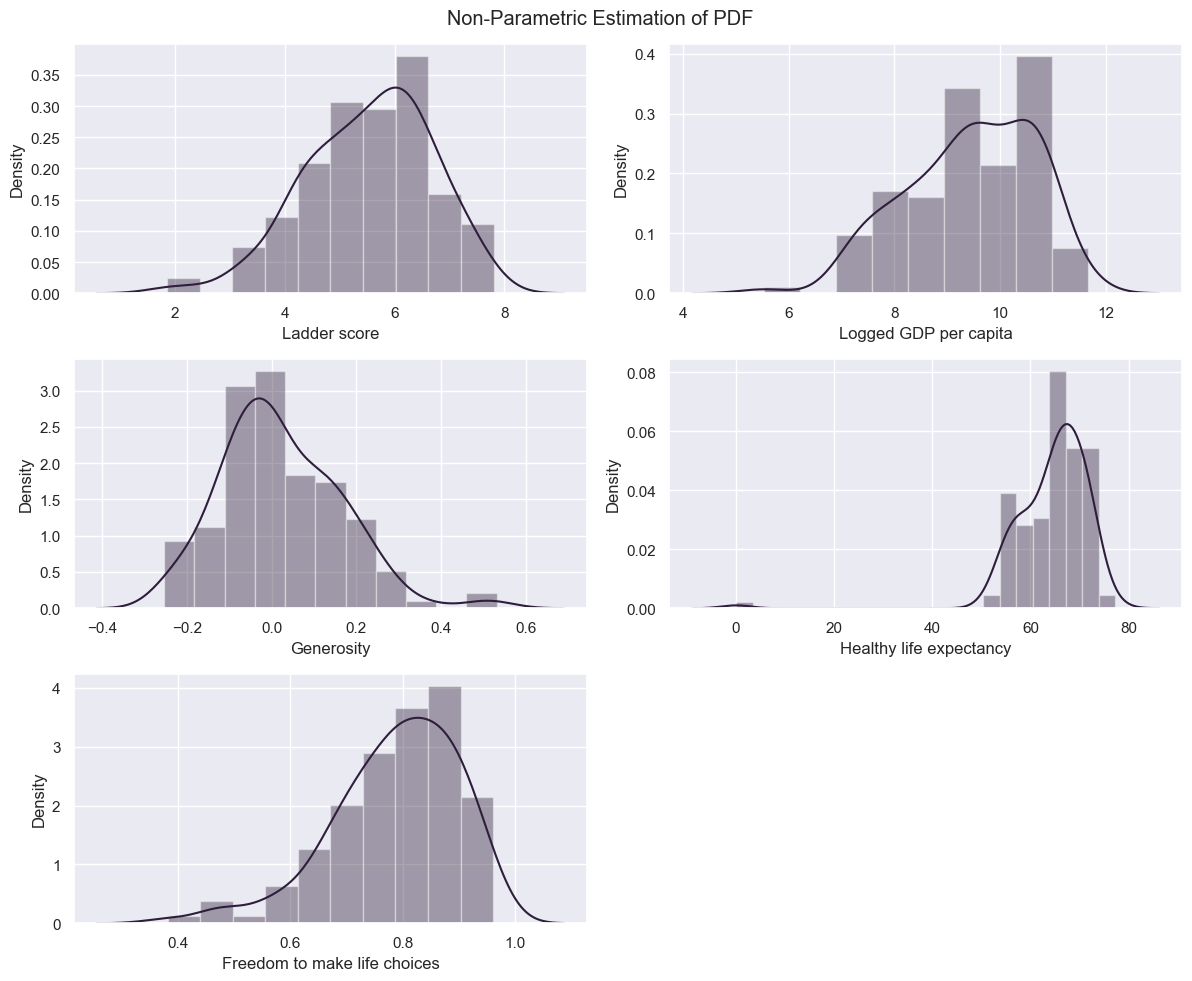

In [24]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Non-Parametric Estimation of PDF')

sns.distplot(data['Ladder score'], ax=ax[0, 0], kde=True)
sns.distplot(data['Logged GDP per capita'], ax=ax[0, 1], kde=True)
sns.distplot(data['Generosity'], ax=ax[1, 0], kde=True)
sns.distplot(data['Healthy life expectancy'], ax=ax[1, 1], kde=True)
sns.distplot(data['Freedom to make life choices'], ax=ax[2, 0], kde=True)


ax[2, 1].axis('off')

sns.set_theme(style='darkgrid', palette='mako')

plt.tight_layout()
plt.show()


Non-parametric estimation of probability density functions (PDFs) is a common technique in statistics and data analysis when the underlying data distribution is not assumed to belong to a specific parametric family of distributions (usually the first distribution we are checking for is the the normal distribution). 
There are two widely used non-parametric methods for estimating PDFs: histograms and kernel density estimation (KDE). In our lab 

**Histograms:**
   
A histogram is a basic non-parametric method of PDF estimation. It divides the data range into bins and counts the number of data points that fall into each bin. By normalizing these counts, we are obtaining an estimate of the PDF. The pros are that it is quite simple to implement and works great for structured data. On the contrary histograms quality heavily depends on the number of bins.

**Kernel Density Estimation (KDE):**

Kernel Density Estimation is a more flexible and smoother method for estimating the PDF. It places a kernel (a smooth, symmetric, and bell-shaped function) on each data point and sums these kernels to obtain the PDF estimate.
The advantages are as follows: it provides a smooth, continuous PDF estimate, it is less sensitive to the choice of bandwidth (smoothing parameter) compared to the number of bins in histograms and it is applicable to data with complex structures or multimodal distributions. However it requires relatively more computation power. The choice of the kernel and bandwidth still affects the result.

##### Estimation of order statistics and represent them as “box with whiskers” plot

Quantiles estimations:
ladder:  [4.1084000000000005, 4.724, 5.684, 6.334, 6.9008]
gdp:  [7.6706, 8.591, 9.567, 10.54, 10.858]
generosity:  [-0.1362, -0.074, 0.001, 0.117, 0.2048]
health:  [55.9106, 60.5, 65.825, 69.35, 71.57]
freedom:  [0.6558, 0.724, 0.801, 0.874, 0.9184]


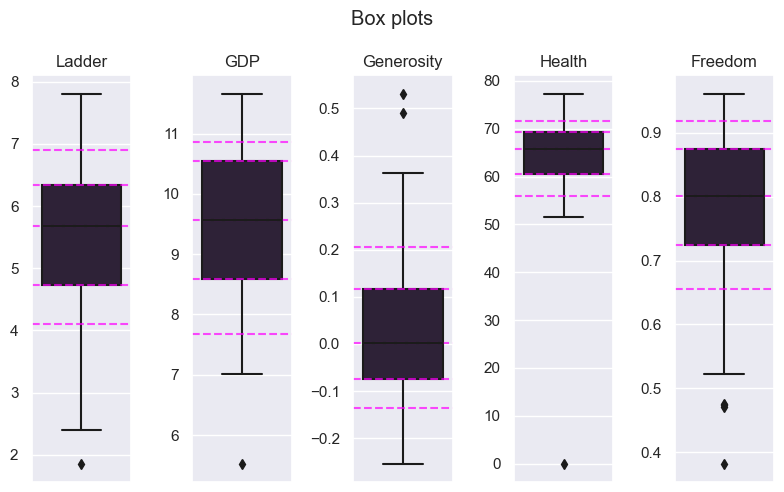

,Mean,Median,Variance,Standart deviation
Ladder score,5.539796,5.6840,1.299438,1.139929
Logged GDP per capita,9.449796,9.5670,1.457579,1.207302
Generosity,0.022431,0.0010,0.020081,0.141707
Healthy life expectancy,64.967632,65.8375,33.066989,5.750390
Freedom to make life choices,0.787394,0.8010,0.012627,0.112371


In [25]:
def plot_box_with_quantiles(data, quantiles, ax, title):
    sns.boxplot(y=data, ax=ax)
    for q in quantiles:
        ax.axhline(q, color='magenta', linestyle='--', alpha=0.7)
    ax.set_title(title)
    
_ladder = data['Ladder score'].to_numpy()
_gdp = data['Logged GDP per capita'].to_numpy()
_generosity = data['Generosity'].to_numpy()
_health = data['Healthy life expectancy'].to_numpy()
_freedom=data['Freedom to make life choices'].to_numpy()

def calculate_quantiles(data): #function to calculate quantiles
    return [np.quantile(data, 0.1), np.quantile(data, 0.25), np.quantile(data, 0.5), np.quantile(data, 0.75), np.quantile(data, 0.9)]

ladder_quantiles = calculate_quantiles(_ladder)
gdp_quantiles = calculate_quantiles(_gdp)
generosity_quantiles =calculate_quantiles(_generosity)
health_quantiles = calculate_quantiles(_health)
freedom_quantiles= calculate_quantiles(_freedom)

#calculating the mean, median, variance and std
classifiers = ['Ladder score', 'Logged GDP per capita', 'Generosity', 'Healthy life expectancy','Freedom to make life choices']
metrics = ["Mean", "Median", "Variance", "Standart deviation"]
results =[]
def stats_calc(data, param):
  mean = data[param].mean()
  median = data[param].median()
  var = data[param].var()
  std = data[param].std()
 
  results.append([mean, median, var, std])
for var in data:
  stats_calc(WHR2023, var)  
results_df = pd.DataFrame(results, columns=metrics, index=classifiers)

#printing the quantiles for each variable

print('Quantiles estimations:')
print('ladder: ', ladder_quantiles)
print('gdp: ', gdp_quantiles)
print('generosity: ', generosity_quantiles)
print('health: ', health_quantiles)
print('freedom: ', freedom_quantiles)

fig, ax = plt.subplots(1, 5, figsize=(8, 5))
fig.suptitle('Box plots')

variables = [_ladder, _gdp, _generosity, _health, _freedom]
quantiles_list = [ladder_quantiles, gdp_quantiles, generosity_quantiles, health_quantiles, freedom_quantiles]
titles = ['Ladder', 'GDP', 'Generosity', 'Health', 'Freedom']

for i in range(5):
    plot_box_with_quantiles(variables[i], quantiles_list[i], ax[i], titles[i])

plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()


results_df

##### Theoretical distributions that could describe the sample

In [26]:
def bootstrap_resample(data, n_resamples=1000):
    n = len(data)
    resamples = np.random.choice(data, (n_resamples, n), replace=True)
    return resamples

def confidence_interval(data, statistic, alpha=0.05):
    resamples = bootstrap_resample(data)
    statistics = [statistic(sample) for sample in resamples]
    lower_percentile = (alpha / 2) * 100
    upper_percentile = 100 - lower_percentile
    lower = np.percentile(statistics, lower_percentile)
    upper = np.percentile(statistics, upper_percentile)
    return lower, upper

def analyze_data(data):
    for column in data.columns:
        column_data = data[column]

# calculating the confidence intervals for mean, median, variance and standart deviation.
        mean_lower, mean_upper = confidence_interval(column_data, np.mean)
        median_lower, median_upper = confidence_interval(column_data, np.median)
        var_lower, var_upper = confidence_interval(column_data, np.var)
        std_lower = np.sqrt(var_lower)
        std_upper = np.sqrt(var_upper)

        print(f"Data Column: {column}")
        print(f"Mean CI: ({mean_lower:.2f}, {mean_upper:.2f})")
        print(f"Median CI: ({median_lower:.2f}, {median_upper:.2f})")
        print(f"Variance CI: ({var_lower:.2f}, {var_upper:.2f})")
        print(f"Std Dev CI: ({std_lower:.2f}, {std_upper:.2f})")

analyze_data(data)



Data Column: Ladder score
Mean CI: (5.35, 5.73)
Median CI: (5.33, 5.93)
Variance CI: (1.00, 1.57)
Std Dev CI: (1.00, 1.25)
Data Column: Logged GDP per capita
Mean CI: (9.25, 9.63)
Median CI: (9.36, 9.81)
Variance CI: (1.16, 1.76)
Std Dev CI: (1.08, 1.33)
Data Column: Generosity
Mean CI: (0.00, 0.05)
Median CI: (-0.02, 0.03)
Variance CI: (0.01, 0.03)
Std Dev CI: (0.12, 0.16)
Data Column: Healthy life expectancy
Mean CI: (63.10, 65.71)
Median CI: (64.95, 66.85)
Variance CI: (28.05, 126.20)
Std Dev CI: (5.30, 11.23)
Data Column: Freedom to make life choices
Mean CI: (0.77, 0.81)
Median CI: (0.79, 0.82)
Variance CI: (0.01, 0.02)
Std Dev CI: (0.10, 0.13)


Based on the Kernel density and order statistics estimation as well as the bootstrap confidence interval estimation for mean, median, variance and standard deviation for each of the variables from the subsample, we are assuming that the theoretical distribution for each variable might be as follows:

**Ladder score** - looks like normal or betta distribution. We're going to estimate the parameters of beta distribution going further.

**Logged GDP per capita** - looks like betta or normal distribution. Will be estimated on closeness to beta.

**Generosity** - looks like gamma or lognorm distribution. We'll proceed assuming it is lognormally distributed.

**Healthy life expectancy** - looks like betta or normal distribution. Will be estimated on closeness to beta.

**Freedom to make life choices** - looks like betta or normal distribution. Will be estimated on closeness to beta.

##### Parameters estimation of chosen distributions using methods of maximum likelihood and least squares method

Ladder score
MLE: (8.413017144195866, 3.5180705887111587, -0.8007989573939879, 8.993072213365235)
LS: [2.66727496 1.71063578 3.69617016 3.288768  ]

Logged GDP per capita
MLE: (5.575891486085039, 2.415455388077454, 3.983456817017264, 7.834593824791707)
LS: [6.27561328 1.14983491 3.99328101 6.97729745]

Generosity
MLE: (0.20903954456403712, -0.6455218165135514, 0.6535183070681803)
LS: [ 0.14463586 -2.59064676  2.6740078 ]

Healthy life expectancy
MLE: (140272206.7626927, 3.919646462233282, -495994482.5744374, 495994560.8462882)
LS: [ 1.40272207e+08  3.91964646e+00 -4.95994483e+08  4.95994561e+08]

Freedom to make life choices
MLE: (7.277070331410334, 1.8120795873364923, 0.06597881025083263, 0.9012294032592414)
LS: [1.         1.         0.03521147 1.        ]



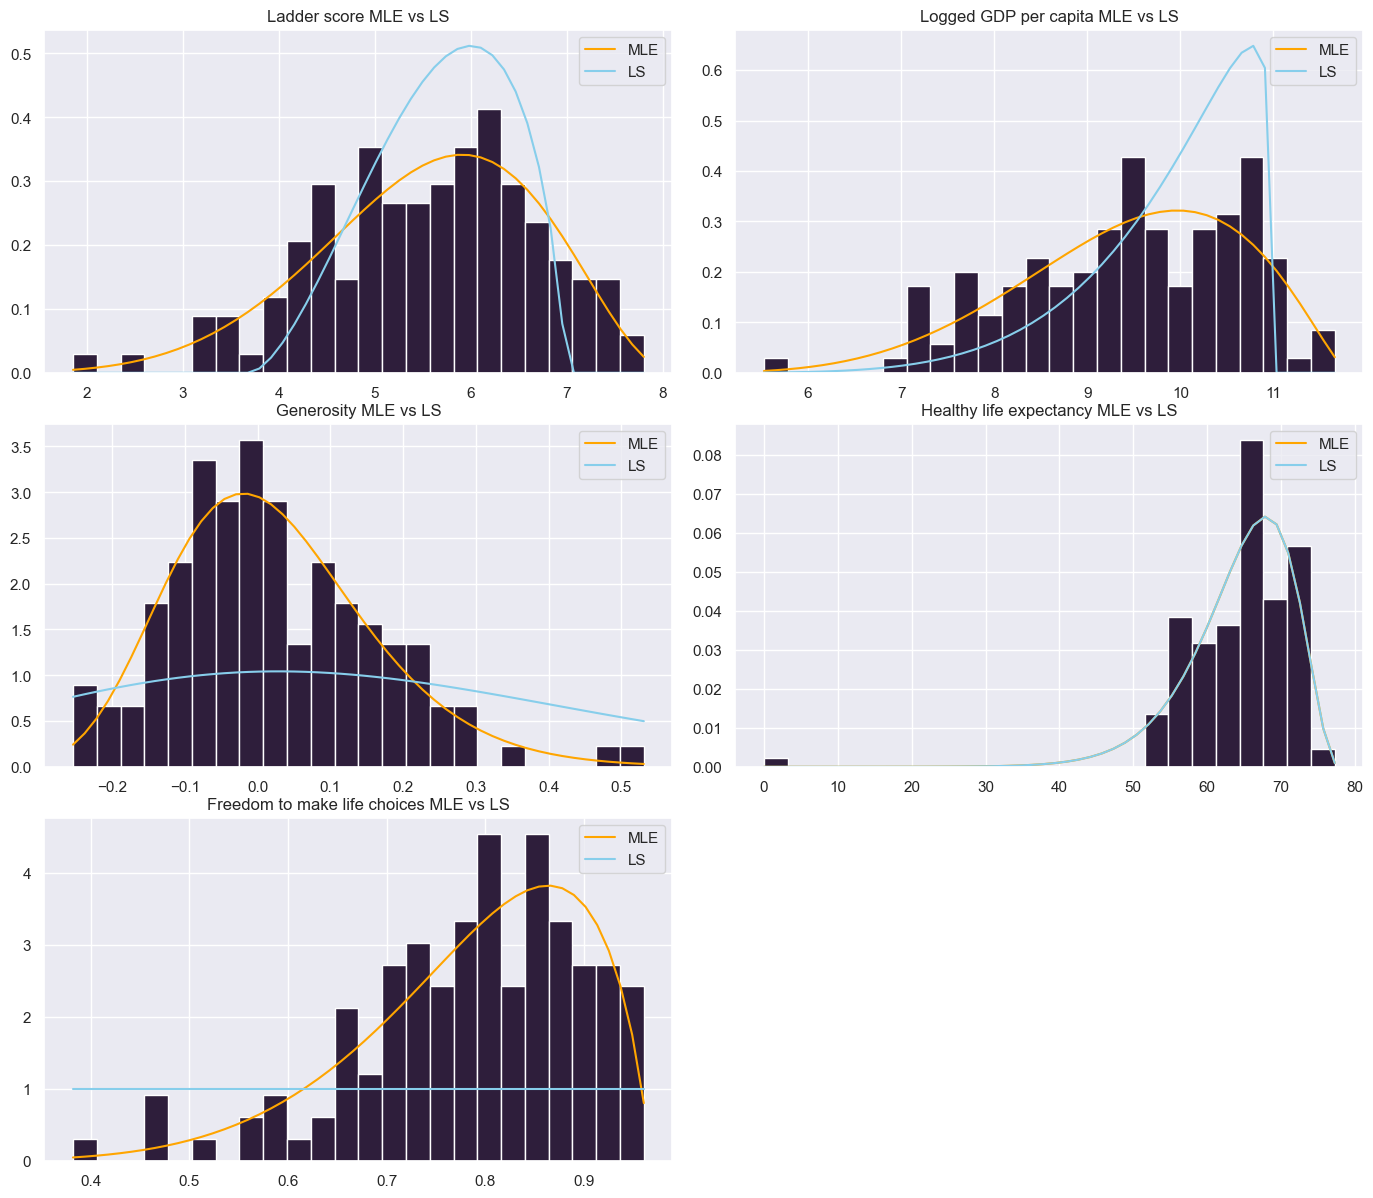

In [31]:
from scipy.stats import beta, lognorm
from scipy.optimize import least_squares

# calculating  residuals for Least Squares
def ls_residuals(params, data, distribution):
    return distribution.pdf(data, *params) - 1.0

#the function estimating the parameters and plotting the results
def fit_and_plot(data, distribution, label, ax):
    MLE_params = distribution.fit(data, method='MLE') #es
    
    #fitting via LS
    initial_guess = distribution.fit(data, method='MLE') #using mle for innitial guess
    result = least_squares(ls_residuals, initial_guess, args=(data, distribution))
    LS_params = result.x

    print(label)
    print(f'MLE: {MLE_params}\nLS: {LS_params}', end='\n\n')

    xgrid = np.linspace(data.min(), data.max())
    ax.hist(data, density=True, bins=24)
    ax.plot(xgrid, distribution.pdf(xgrid, *MLE_params), label='MLE', color='orange')
    ax.plot(xgrid, distribution.pdf(xgrid, *LS_params), label='LS', color='skyblue')
    ax.set_title(f'{label} MLE vs LS')
    ax.legend()

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.tight_layout()

#calling the function
fit_and_plot(data['Ladder score'], beta, 'Ladder score', axes[0, 0])
fit_and_plot(data['Logged GDP per capita'], beta, 'Logged GDP per capita', axes[0, 1])
fit_and_plot(data['Generosity'], lognorm, 'Generosity', axes[1, 0])
fit_and_plot(data['Healthy life expectancy'], beta, 'Healthy life expectancy', axes[1, 1])
fit_and_plot(data['Freedom to make life choices'], beta, 'Freedom to make life choices', axes[2, 0])

axes[2, 1].axis('off')

plt.show()



We've estimated the parameters of the chosen distributions using the methods of maximum likelihood and least squares. The results are presented in the plots above for each variable, where the orange line is the estimation by MLE and the blue stands for the LS. In the case for our data and assumed distributions MLE method seemingly performed better.

_Just a side note:_ for the Healthy life expectancy variable Maximum likelihood and Least squares methods are so close that the plots are overlapping and the orange(MLE) is almost invisible due to being underneath.

##### Validation of estimated parameters using QQ biplots

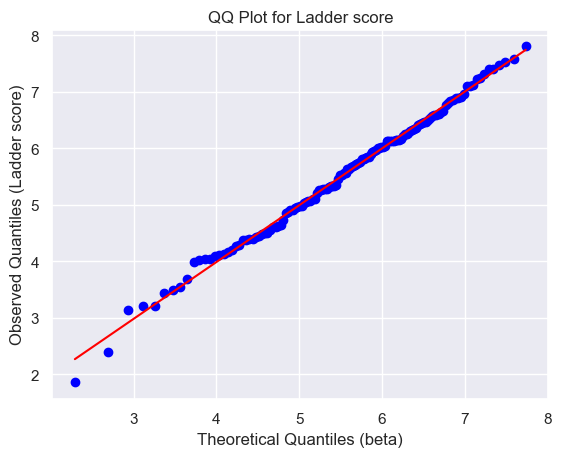

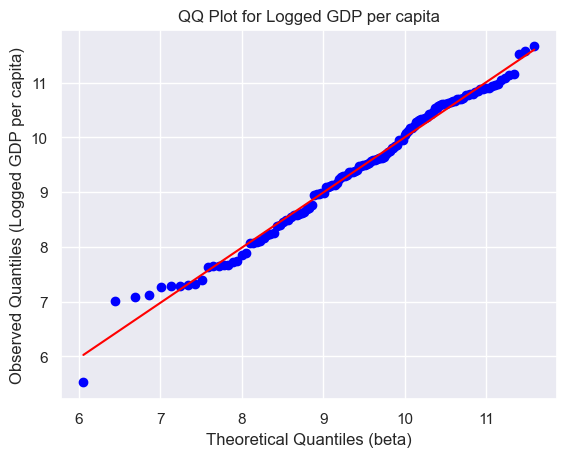

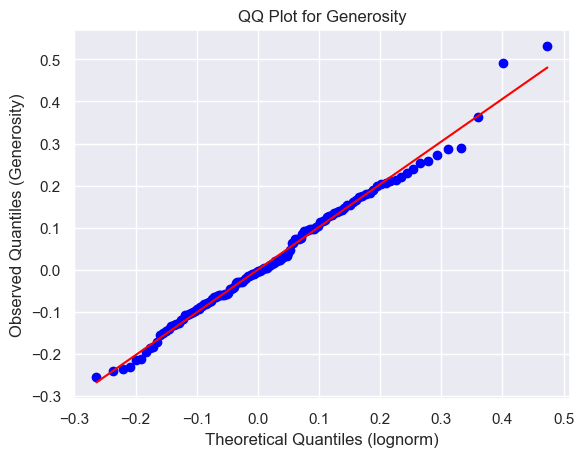

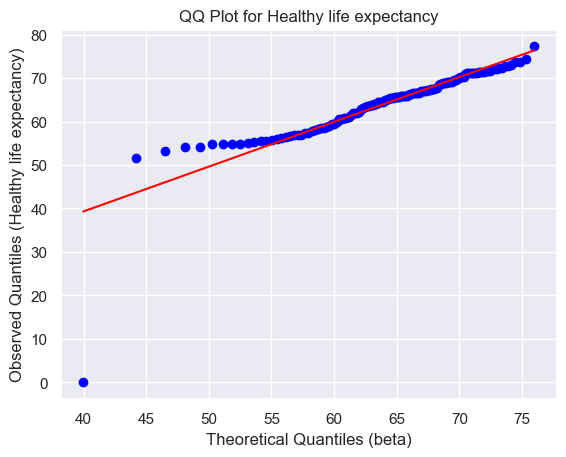

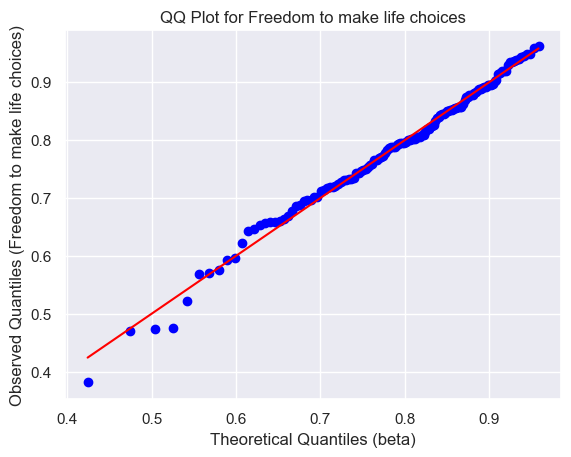

In [28]:
import seaborn as sns
sns.set_theme(style='darkgrid', palette='mako')
def qq_plot(data, distribution, label):
    MLE_params = distribution.fit(data, method='MLE')

# generating the random samples for the estimated distribution
    random_samples = distribution.rvs(size=len(data), *MLE_params)

#calculating quantiles for both the data and random samples
    data_quantiles = np.percentile(data, np.linspace(0, 100, len(data)))
    random_quantiles = np.percentile(random_samples, np.linspace(0, 100, len(data)))
    fig = plt.figsize=(6, 6)
#creating Q-Q plots
    stats.probplot(data, dist=distribution, sparams=MLE_params, plot=plt,)
    
    plt.title(f'QQ Plot for {label}')
    plt.xlabel(f'Theoretical Quantiles ({distribution.name})')
    plt.ylabel(f'Observed Quantiles ({label})')
    plt.show()

qq_plot(data['Ladder score'], stats.beta, 'Ladder score')
qq_plot(data['Logged GDP per capita'], stats.beta, 'Logged GDP per capita')
qq_plot(data['Generosity'], stats.lognorm, 'Generosity')
qq_plot(data['Healthy life expectancy'], stats.beta, 'Healthy life expectancy')
qq_plot(data['Freedom to make life choices'], stats.beta, 'Freedom to make life choices')


A **Quantile-Quantile (Q-Q) plot** is a graphical tool used to assess whether a dataset follows a particular theoretical distribution. It provides a visual way to compare the quantiles (ordered values) of your data to the quantiles of a theoretical distribution. 
Q-Q plots are used to check if the observed data follows a specified distribution. Common choices are the normal distribution, exponential distribution, or any other theoretical distribution. They help identify outliers in the data by observing extreme deviations from the theoretical quantiles. 
In a Q-Q plot, the quantiles of our observed data are plotted against the quantiles of a theoretical distribution. If the data closely follows the theoretical distribution, the points in the Q-Q plot will approximately fall on a straight line. Deviations from a straight line indicate differences between the data and the theoretical distribution.

In our case the Q-Q plots fall approximately along a straight line for all of the variables, so that suggests that our data actually follows the assumed theoretical distribution.
However, we can also see the points that deviate from the straight line, those represent potential outliers that can be removed for the better results. 

##### Correctness estimation of fitted distributions

The **Kolmogorov-Smirnov Test (KS Test)** compares the empirical distribution function of your data with the cumulative distribution function of the theoretical distribution. It's widely used and readily available in many statistical libraries.

We also gave our other assumed distributions as parameters to the function that is choosing the best fit to validate our assumptions.

In [29]:
distributions = [
    stats.lognorm,
    stats.gamma,
    stats.beta,
    stats.norm]

best_fit = {}  
best_params = {}
best_p_values = {}  # Dictionary to store the best p-values

for column in data.columns:
    column_data = data[column]
    best_fit_name = ''
    best_ks = float('inf')
    best_p_value = None  # Initialize the best p-value to None

    for distribution in distributions:
        # Fitting the distribution to the data
        params = distribution.fit(column_data)

        # The Kolmogorov-Smirnov statistic 
        ks_statistic, p_value = stats.kstest(column_data, distribution.cdf, args=params)

        # Checking the fit of the distribution
        if ks_statistic < best_ks:
            best_fit_name = distribution.name
            best_params[column] = params
            best_ks = ks_statistic
            best_p_value = p_value

    best_fit[column] = best_fit_name
    best_p_values[column] = best_p_value  # Store the best p-value

for variable, distribution in best_fit.items():
    print(f'Best-fit distribution for {variable}: {distribution}')
    print(f'Parameters for {variable}: {best_params[variable]}')
    print(f'P-value for {variable}: {best_p_values[variable]}')  # Print the p-value


Best-fit distribution for Ladder score: beta
Parameters for Ladder score: (8.413017144195866, 3.5180705887111587, -0.8007989573939879, 8.993072213365235)
P-value for Ladder score: 0.9948013619555299
Best-fit distribution for Logged GDP per capita: beta
Parameters for Logged GDP per capita: (5.575891486085039, 2.415455388077454, 3.983456817017264, 7.834593824791707)
P-value for Logged GDP per capita: 0.772685028499583
Best-fit distribution for Generosity: lognorm
Parameters for Generosity: (0.20903954456403712, -0.6455218165135514, 0.6535183070681803)
P-value for Generosity: 0.9363127149331053
Best-fit distribution for Healthy life expectancy: beta
Parameters for Healthy life expectancy: (140272206.7626927, 3.919646462233282, -495994482.5744374, 495994560.8462882)
P-value for Healthy life expectancy: 0.6449033610658184
Best-fit distribution for Freedom to make life choices: beta
Parameters for Freedom to make life choices: (7.277070331410334, 1.8120795873364923, 0.06597881025083263, 0.9

For all of the variables, the KS p-value is greater than 0.05, which indicated that there are no reasons to assume that observed variables have different distributions other than the ones being tested.

The **Cramér-von Mises Test** is similar to the KS test but often considered to be more powerful, especially for small to moderate sample sizes.

In [30]:
distributions = [
    stats.lognorm,
    stats.gamma,
    stats.beta,
    stats.norm]

best_fit = {}  
best_params = {}
best_p_values = {}  

for column in data.columns:
    column_data = data[column]
    best_fit_name = ''
    best_cvm = float('inf')


    for distribution in distributions:
        
        params = distribution.fit(column_data)

        # Cramér-von Mises statistic 
        cvm_statistic = stats.cramervonmises(column_data, distribution.cdf, args=params)

        # checking the fit
        if cvm_statistic.statistic < best_cvm:
            best_fit_name = distribution.name
            best_params[column] = params
            best_cvm = cvm_statistic.statistic
            best_p=cvm_statistic.pvalue

    best_fit[column] = best_fit_name
    best_p_values[column] = best_p
    
for variable, distribution in best_fit.items():
    print(f'Best-fit distribution for {variable}: {distribution}')
    print(f'Parameters for {variable}: {best_params[variable]}')
    print(f'P-value for {variable}: {best_p_values[variable]}') #p-value
    


Best-fit distribution for Ladder score: beta
Parameters for Ladder score: (8.413017144195866, 3.5180705887111587, -0.8007989573939879, 8.993072213365235)
P-value for Ladder score: 0.9923427553208003
Best-fit distribution for Logged GDP per capita: beta
Parameters for Logged GDP per capita: (5.575891486085039, 2.415455388077454, 3.983456817017264, 7.834593824791707)
P-value for Logged GDP per capita: 0.8085807231012964
Best-fit distribution for Generosity: lognorm
Parameters for Generosity: (0.20903954456403712, -0.6455218165135514, 0.6535183070681803)
P-value for Generosity: 0.9541181887461139
Best-fit distribution for Healthy life expectancy: beta
Parameters for Healthy life expectancy: (140272206.7626927, 3.919646462233282, -495994482.5744374, 495994560.8462882)
P-value for Healthy life expectancy: 0.5930871908145672
Best-fit distribution for Freedom to make life choices: beta
Parameters for Freedom to make life choices: (7.277070331410334, 1.8120795873364923, 0.06597881025083263, 0.

The Cramér-von Mises Test shows similar results to the Kolmogorov-Smirnov Test, for all of the variables p-value > 0.05. So the assumption of the theoretical distribution and its parameters might be correct.

## Conclusion

To sum up, we have selected the subset from the World Happiness Report of 2023 that included 5 variables - Ladder score, Logged GDP per capita, Generosity, Healthy life expectancy, and Freedom to make life choices. That we've performed a non-parametric distribution estimate of each of the variables in the form of a histogram and using kernel density function. Then we've estimated the order statistics and plotted them as box-plots. Then estimated the 95% Confidence intervals for the mean, median, variance and standard deviation. Based on the non-parametric we've concluded that theoretical distributions that might describe our data are: beta for the Ladder score, Logged GDP per capita, Healthy life expectancy and Freedom to make life choices; lognormal for Generosity.

For the parametric analysis part we've tried to estimate the parameters of the assumed theoretical distributions using the Maximum Likelihood and Least Squares methods. Then validated the estimation using Q-Q plots and two statistical tests - Kolmogorov-Smirnov and Cramér-von Mises. All of them showed no reason to reject the initial hypothesis of the variables' theoretical distributions. However, it does not mean that there is no better fitting theoretical distribution for those variables.